In [1]:
!pip install hopsworks

In [2]:
import os
import hopsworks

with open('hopsworks-api-key.txt', 'r') as file:
    os.environ["HOPSWORKS_API_KEY"] = file.read().rstrip()

#Sign in to Hopsworks and get feature store
project = hopsworks.login()
fs = project.get_feature_store()

#Extract features to a dataframe
features = fs.get_feature_group('airline_delay2', version=1) #You may have given a different name to your fs
features_df = features.read()


Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1171606
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.01s) 


In [3]:
features_df

,year,month,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,late_aircraft_delay,temperature_2m,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_direction_10m,event_time,month_sin,month_cos
0,2015,9,F9,Frontier Airlines Inc.,540.0,91.0,25.33,0.60,37.88,0.00,...,2580.0,22.313194,0.00,0.0,63.563889,8.610139,152.913889,2015-09-01,-1.000000e+00,-1.836970e-16
1,2021,6,B6,JetBlue Airways,265.0,70.0,29.52,4.39,21.36,1.29,...,1426.0,23.766667,0.00,0.0,64.980556,10.523611,182.206944,2021-06-01,1.224647e-16,-1.000000e+00
2,2021,3,9E,Endeavor Air Inc.,6015.0,374.0,114.27,15.69,132.70,0.00,...,6950.0,13.619220,0.00,0.0,63.536290,14.203763,187.864247,2021-03-01,1.000000e+00,6.123234e-17
3,2023,11,NK,Spirit Airlines,1056.0,274.0,82.47,2.65,89.89,5.94,...,7946.0,11.596250,0.00,0.0,49.791667,12.564861,202.425000,2023-11-01,-5.000000e-01,8.660254e-01
4,2022,10,OO,SkyWest Airlines Inc.,1184.0,167.0,137.00,26.00,1.00,2.00,...,63.0,15.480376,0.00,0.0,33.852151,12.409140,214.998656,2022-10-01,-8.660254e-01,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,2019,3,9E,Endeavor Air Inc.,3142.0,390.0,89.24,6.11,101.28,0.00,...,13037.0,11.090995,0.77,0.0,66.270161,13.822177,225.672043,2019-03-01,1.000000e+00,6.123234e-17
1600,2021,8,UA,United Air Lines Network,301.0,100.0,38.25,4.95,22.73,0.00,...,2152.0,25.063038,0.00,0.0,58.299731,8.405645,170.631720,2021-08-01,-8.660254e-01,-5.000000e-01
1601,2018,8,F9,Frontier Airlines,303.0,110.0,30.41,0.04,36.37,0.00,...,3245.0,23.993683,0.00,0.0,63.663978,8.558737,206.354839,2018-08-01,-8.660254e-01,-5.000000e-01
1602,2019,4,ZW,Air Wisconsin Airlines Corp,4.0,1.0,0.00,0.00,0.00,0.00,...,142.0,16.872639,0.00,0.0,59.018056,13.064861,200.761111,2019-04-01,8.660254e-01,-5.000000e-01


In [4]:
original_df = features_df.copy()
original_df

,year,month,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,late_aircraft_delay,temperature_2m,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_direction_10m,event_time,month_sin,month_cos
0,2015,9,F9,Frontier Airlines Inc.,540.0,91.0,25.33,0.60,37.88,0.00,...,2580.0,22.313194,0.00,0.0,63.563889,8.610139,152.913889,2015-09-01,-1.000000e+00,-1.836970e-16
1,2021,6,B6,JetBlue Airways,265.0,70.0,29.52,4.39,21.36,1.29,...,1426.0,23.766667,0.00,0.0,64.980556,10.523611,182.206944,2021-06-01,1.224647e-16,-1.000000e+00
2,2021,3,9E,Endeavor Air Inc.,6015.0,374.0,114.27,15.69,132.70,0.00,...,6950.0,13.619220,0.00,0.0,63.536290,14.203763,187.864247,2021-03-01,1.000000e+00,6.123234e-17
3,2023,11,NK,Spirit Airlines,1056.0,274.0,82.47,2.65,89.89,5.94,...,7946.0,11.596250,0.00,0.0,49.791667,12.564861,202.425000,2023-11-01,-5.000000e-01,8.660254e-01
4,2022,10,OO,SkyWest Airlines Inc.,1184.0,167.0,137.00,26.00,1.00,2.00,...,63.0,15.480376,0.00,0.0,33.852151,12.409140,214.998656,2022-10-01,-8.660254e-01,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,2019,3,9E,Endeavor Air Inc.,3142.0,390.0,89.24,6.11,101.28,0.00,...,13037.0,11.090995,0.77,0.0,66.270161,13.822177,225.672043,2019-03-01,1.000000e+00,6.123234e-17
1600,2021,8,UA,United Air Lines Network,301.0,100.0,38.25,4.95,22.73,0.00,...,2152.0,25.063038,0.00,0.0,58.299731,8.405645,170.631720,2021-08-01,-8.660254e-01,-5.000000e-01
1601,2018,8,F9,Frontier Airlines,303.0,110.0,30.41,0.04,36.37,0.00,...,3245.0,23.993683,0.00,0.0,63.663978,8.558737,206.354839,2018-08-01,-8.660254e-01,-5.000000e-01
1602,2019,4,ZW,Air Wisconsin Airlines Corp,4.0,1.0,0.00,0.00,0.00,0.00,...,142.0,16.872639,0.00,0.0,59.018056,13.064861,200.761111,2019-04-01,8.660254e-01,-5.000000e-01


In [5]:
import pandas as pd

#Ensure event_time is in datetime format
features_df['event_time'] = pd.to_datetime(features_df['event_time'])

#Sort by carrier and event_time
features_df.sort_values(by=['carrier', 'event_time'], inplace=True)

features_df

,year,month,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,late_aircraft_delay,temperature_2m,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_direction_10m,event_time,month_sin,month_cos
1161,2018,1,9E,Endeavor Air Inc.,1838.0,343.0,70.04,19.87,82.88,0.0,...,15242.0,3.281317,2.8,0.003078,46.034946,14.515457,221.473118,2018-01-01,5.000000e-01,8.660254e-01
198,2018,2,9E,Endeavor Air Inc.,1889.0,306.0,63.57,8.46,75.77,0.0,...,13391.0,12.776339,0.0,0.000000,73.910714,14.201935,191.611607,2018-02-01,8.660254e-01,5.000000e-01
1125,2018,3,9E,Endeavor Air Inc.,2294.0,360.0,60.05,7.90,130.10,0.0,...,10859.0,10.554435,0.0,0.000000,55.790323,16.008333,236.434140,2018-03-01,1.000000e+00,6.123234e-17
444,2018,4,9E,Endeavor Air Inc.,2496.0,373.0,62.43,12.01,116.31,0.0,...,13630.0,13.889583,0.0,0.000000,51.016667,14.563750,219.086111,2018-04-01,8.660254e-01,-5.000000e-01
1283,2018,5,9E,Endeavor Air Inc.,2507.0,338.0,55.72,16.12,136.55,0.0,...,8275.0,21.307258,0.0,0.000000,64.889785,9.410618,176.768817,2018-05-01,5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2019,12,ZW,Air Wisconsin Airlines Corp,4.0,0.0,0.00,0.00,0.00,0.0,...,0.0,9.251882,0.0,0.000000,64.491935,15.852419,174.354839,2019-12-01,-2.449294e-16,1.000000e+00
850,2020,1,ZW,Air Wisconsin Airlines Corp,3.0,0.0,0.00,0.00,0.00,0.0,...,0.0,8.643952,0.0,0.000000,63.079301,14.142204,207.084677,2020-01-01,5.000000e-01,8.660254e-01
292,2020,2,ZW,Air Wisconsin Airlines Corp,6.0,0.0,0.00,0.00,0.00,0.0,...,0.0,8.898420,2.1,0.000000,71.995690,14.237356,209.724138,2020-02-01,8.660254e-01,5.000000e-01
917,2020,3,ZW,Air Wisconsin Airlines Corp,4.0,0.0,0.00,0.00,0.00,0.0,...,0.0,14.935618,0.0,0.000000,77.525538,12.903898,209.344086,2020-03-01,1.000000e+00,6.123234e-17


In [6]:
#We lag features that are cumulative (except for the target variable arr_delay)
lag_features = [
    'carrier_delay', 'weather_delay', 'late_aircraft_delay', 'security_delay', 'nas_delay',
    'arr_del15', 'arr_flights', 'arr_diverted', 'arr_cancelled'
]

#Create lagged features (overwrite previous)
for feature in lag_features:
    features_df[feature] = features_df[feature].shift(1)

#Create the lagged 'arr_delay' feature (one month back)
features_df['arr_delay_lag1'] = features_df.groupby('carrier')['arr_delay'].shift(1)

features_df.dropna(inplace=True)

features_df

,year,month,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,temperature_2m,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_direction_10m,event_time,month_sin,month_cos,arr_delay_lag1
198,2018,2,9E,Endeavor Air Inc.,1838.0,343.0,63.57,8.46,75.77,0.0,...,12.776339,0.0,0.0,73.910714,14.201935,191.611607,2018-02-01,8.660254e-01,5.000000e-01,36053.0
1125,2018,3,9E,Endeavor Air Inc.,1889.0,306.0,60.05,7.90,130.10,0.0,...,10.554435,0.0,0.0,55.790323,16.008333,236.434140,2018-03-01,1.000000e+00,6.123234e-17,29744.0
444,2018,4,9E,Endeavor Air Inc.,2294.0,360.0,62.43,12.01,116.31,0.0,...,13.889583,0.0,0.0,51.016667,14.563750,219.086111,2018-04-01,8.660254e-01,-5.000000e-01,24544.0
1283,2018,5,9E,Endeavor Air Inc.,2496.0,373.0,55.72,16.12,136.55,0.0,...,21.307258,0.0,0.0,64.889785,9.410618,176.768817,2018-05-01,5.000000e-01,-8.660254e-01,24910.0
449,2018,6,9E,Endeavor Air Inc.,2507.0,338.0,77.39,29.48,145.30,0.0,...,24.130833,0.0,0.0,59.934722,8.499444,231.106944,2018-06-01,1.224647e-16,-1.000000e+00,21647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2019,12,ZW,Air Wisconsin Airlines Corp,8.0,2.0,0.00,0.00,0.00,0.0,...,9.251882,0.0,0.0,64.491935,15.852419,174.354839,2019-12-01,-2.449294e-16,1.000000e+00,52.0
850,2020,1,ZW,Air Wisconsin Airlines Corp,4.0,0.0,0.00,0.00,0.00,0.0,...,8.643952,0.0,0.0,63.079301,14.142204,207.084677,2020-01-01,5.000000e-01,8.660254e-01,0.0
292,2020,2,ZW,Air Wisconsin Airlines Corp,3.0,0.0,0.00,0.00,0.00,0.0,...,8.898420,2.1,0.0,71.995690,14.237356,209.724138,2020-02-01,8.660254e-01,5.000000e-01,0.0
917,2020,3,ZW,Air Wisconsin Airlines Corp,6.0,0.0,0.00,0.00,0.00,0.0,...,14.935618,0.0,0.0,77.525538,12.903898,209.344086,2020-03-01,1.000000e+00,6.123234e-17,0.0


In [7]:
import pandas as pd

#Find carriers who have gaps in between their timestamps (leading to inaccurate
#time series forecasting).

#Group timestamps by carrier and sort them
carrier_timestamps = features_df.groupby('carrier')['event_time'].apply(lambda x: x.sort_values().unique())

gap_counts = {}

for carrier, timestamps in carrier_timestamps.items():
    # Calculate difference between consecutive timestamps
    diffs = pd.Series(timestamps).diff().dt.days  # Get difference in days
    gaps = (diffs > 31).sum()  # Count gaps longer than 31 days (1 month)
    gap_counts[carrier] = gaps


for carrier, count in gap_counts.items():
    print(f"Carrier: {carrier}, Gaps: {count}")


Carrier: 9E, Gaps: 0
Carrier: AA, Gaps: 0
Carrier: AS, Gaps: 0
Carrier: AX, Gaps: 0
Carrier: B6, Gaps: 0
Carrier: DL, Gaps: 0
Carrier: EV, Gaps: 2
Carrier: F9, Gaps: 0
Carrier: FL, Gaps: 0
Carrier: G7, Gaps: 0
Carrier: MQ, Gaps: 6
Carrier: NK, Gaps: 0
Carrier: OH, Gaps: 0
Carrier: OO, Gaps: 0
Carrier: UA, Gaps: 0
Carrier: US, Gaps: 0
Carrier: WN, Gaps: 0
Carrier: YV, Gaps: 1
Carrier: YX, Gaps: 0
Carrier: ZW, Gaps: 3


In [8]:
carriers_to_drop = ['EV', 'G7', 'YV', 'ZW']
filtered_df = features_df[~features_df['carrier'].isin(carriers_to_drop)]

print(f"Dropped Carriers: {carriers_to_drop}")
print(f"Remaining Carriers: {filtered_df['carrier'].nunique()}")


Dropped Carriers: ['EV', 'G7', 'YV', 'ZW']
Remaining Carriers: 16


In [9]:
features_df = filtered_df.copy()
features_df

,year,month,carrier,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,temperature_2m,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_direction_10m,event_time,month_sin,month_cos,arr_delay_lag1
198,2018,2,9E,Endeavor Air Inc.,1838.0,343.0,63.57,8.46,75.77,0.0,...,12.776339,0.0,0.0,73.910714,14.201935,191.611607,2018-02-01,8.660254e-01,5.000000e-01,36053.0
1125,2018,3,9E,Endeavor Air Inc.,1889.0,306.0,60.05,7.90,130.10,0.0,...,10.554435,0.0,0.0,55.790323,16.008333,236.434140,2018-03-01,1.000000e+00,6.123234e-17,29744.0
444,2018,4,9E,Endeavor Air Inc.,2294.0,360.0,62.43,12.01,116.31,0.0,...,13.889583,0.0,0.0,51.016667,14.563750,219.086111,2018-04-01,8.660254e-01,-5.000000e-01,24544.0
1283,2018,5,9E,Endeavor Air Inc.,2496.0,373.0,55.72,16.12,136.55,0.0,...,21.307258,0.0,0.0,64.889785,9.410618,176.768817,2018-05-01,5.000000e-01,-8.660254e-01,24910.0
449,2018,6,9E,Endeavor Air Inc.,2507.0,338.0,77.39,29.48,145.30,0.0,...,24.130833,0.0,0.0,59.934722,8.499444,231.106944,2018-06-01,1.224647e-16,-1.000000e+00,21647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2024,5,YX,Republic Airline,133.0,19.0,12.69,2.41,11.93,0.0,...,22.098790,0.0,0.0,57.318548,10.901075,208.323925,2024-05-01,5.000000e-01,-8.660254e-01,890.0
822,2024,6,YX,Republic Airline,176.0,37.0,1.08,0.90,1.44,0.0,...,26.231111,0.0,0.0,49.611111,11.175139,180.912500,2024-06-01,1.224647e-16,-1.000000e+00,2314.0
165,2024,7,YX,Republic Airline,61.0,5.0,2.42,0.17,5.38,0.0,...,26.036156,0.0,0.0,69.131720,8.563441,213.862903,2024-07-01,-5.000000e-01,-8.660254e-01,418.0
993,2024,8,YX,Republic Airline,49.0,9.0,3.16,1.98,3.20,0.0,...,25.959005,0.0,0.0,25.107527,10.002151,197.163978,2024-08-01,-8.660254e-01,-5.000000e-01,997.0


In [10]:
#Drop redundant variables
features_df.drop(columns=['event_time', 'month', 'carrier_name'], inplace=True)

#These are also more accurately reflected by other variables
features_df.drop(columns=['carrier_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'weather_ct'], inplace=True)

features_df

,year,carrier,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,...,late_aircraft_delay,temperature_2m,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_direction_10m,month_sin,month_cos,arr_delay_lag1
198,2018,9E,1838.0,343.0,66.0,1.0,29744.0,11474.0,3408.0,5929.0,...,15242.0,12.776339,0.0,0.0,73.910714,14.201935,191.611607,8.660254e-01,5.000000e-01,36053.0
1125,2018,9E,1889.0,306.0,19.0,6.0,24544.0,12005.0,1170.0,3178.0,...,13391.0,10.554435,0.0,0.0,55.790323,16.008333,236.434140,1.000000e+00,6.123234e-17,29744.0
444,2018,9E,2294.0,360.0,14.0,1.0,24910.0,8188.0,685.0,4812.0,...,10859.0,13.889583,0.0,0.0,51.016667,14.563750,219.086111,8.660254e-01,-5.000000e-01,24544.0
1283,2018,9E,2496.0,373.0,10.0,1.0,21647.0,6670.0,914.0,3696.0,...,13630.0,21.307258,0.0,0.0,64.889785,9.410618,176.768817,5.000000e-01,-8.660254e-01,24910.0
449,2018,9E,2507.0,338.0,4.0,1.0,51218.0,7059.0,1510.0,4803.0,...,8275.0,24.130833,0.0,0.0,59.934722,8.499444,231.106944,1.224647e-16,-1.000000e+00,21647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2024,YX,133.0,19.0,1.0,0.0,2314.0,274.0,11.0,130.0,...,475.0,22.098790,0.0,0.0,57.318548,10.901075,208.323925,5.000000e-01,-8.660254e-01,890.0
822,2024,YX,176.0,37.0,0.0,1.0,418.0,1111.0,172.0,477.0,...,554.0,26.231111,0.0,0.0,49.611111,11.175139,180.912500,1.224647e-16,-1.000000e+00,2314.0
165,2024,YX,61.0,5.0,0.0,0.0,997.0,63.0,183.0,105.0,...,67.0,26.036156,0.0,0.0,69.131720,8.563441,213.862903,-5.000000e-01,-8.660254e-01,418.0
993,2024,YX,49.0,9.0,2.0,0.0,647.0,576.0,20.0,309.0,...,92.0,25.959005,0.0,0.0,25.107527,10.002151,197.163978,-8.660254e-01,-5.000000e-01,997.0


Now we want to remove features that can lead to overfitting or carry little information.

We want to test for:
* Low variance
* Multicollinearity
* Low feature importance (to the target variable arr_delay)

For the latter two, we'll rescale all features that are not categorical representations or temporal order representations.

In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

#Identify numeric columns that can be converted to double

#Remove carrier and temporal order variables from scaling
numeric_cols = [col for col in features_df.columns if col not in ['carrier', 'year', 'month_sin', 'month_cos']]

#Normalize year separately
features_df['year'] = features_df['year'] - features_df['year'].min()


In [12]:
features_df

,year,carrier,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,...,late_aircraft_delay,temperature_2m,snowfall,snow_depth,cloud_cover,wind_speed_10m,wind_direction_10m,month_sin,month_cos,arr_delay_lag1
198,4,9E,1838.0,343.0,66.0,1.0,29744.0,11474.0,3408.0,5929.0,...,15242.0,12.776339,0.0,0.0,73.910714,14.201935,191.611607,8.660254e-01,5.000000e-01,36053.0
1125,4,9E,1889.0,306.0,19.0,6.0,24544.0,12005.0,1170.0,3178.0,...,13391.0,10.554435,0.0,0.0,55.790323,16.008333,236.434140,1.000000e+00,6.123234e-17,29744.0
444,4,9E,2294.0,360.0,14.0,1.0,24910.0,8188.0,685.0,4812.0,...,10859.0,13.889583,0.0,0.0,51.016667,14.563750,219.086111,8.660254e-01,-5.000000e-01,24544.0
1283,4,9E,2496.0,373.0,10.0,1.0,21647.0,6670.0,914.0,3696.0,...,13630.0,21.307258,0.0,0.0,64.889785,9.410618,176.768817,5.000000e-01,-8.660254e-01,24910.0
449,4,9E,2507.0,338.0,4.0,1.0,51218.0,7059.0,1510.0,4803.0,...,8275.0,24.130833,0.0,0.0,59.934722,8.499444,231.106944,1.224647e-16,-1.000000e+00,21647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,10,YX,133.0,19.0,1.0,0.0,2314.0,274.0,11.0,130.0,...,475.0,22.098790,0.0,0.0,57.318548,10.901075,208.323925,5.000000e-01,-8.660254e-01,890.0
822,10,YX,176.0,37.0,0.0,1.0,418.0,1111.0,172.0,477.0,...,554.0,26.231111,0.0,0.0,49.611111,11.175139,180.912500,1.224647e-16,-1.000000e+00,2314.0
165,10,YX,61.0,5.0,0.0,0.0,997.0,63.0,183.0,105.0,...,67.0,26.036156,0.0,0.0,69.131720,8.563441,213.862903,-5.000000e-01,-8.660254e-01,418.0
993,10,YX,49.0,9.0,2.0,0.0,647.0,576.0,20.0,309.0,...,92.0,25.959005,0.0,0.0,25.107527,10.002151,197.163978,-8.660254e-01,-5.000000e-01,997.0


In [13]:
import pandas as pd

#Variance test
cv = features_df[numeric_cols].std() / features_df[numeric_cols].mean()
threshold = 0.2
low_cv_features = cv[cv < threshold].index

print("Low Relative Variance Features:", low_cv_features)

features_df.drop(columns=low_cv_features, inplace=True)
numeric_cols = [col for col in numeric_cols if col not in low_cv_features]

features_df

Low Relative Variance Features: Index(['cloud_cover', 'wind_direction_10m'], dtype='object')


,year,carrier,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,temperature_2m,snowfall,snow_depth,wind_speed_10m,month_sin,month_cos,arr_delay_lag1
198,4,9E,1838.0,343.0,66.0,1.0,29744.0,11474.0,3408.0,5929.0,0.0,15242.0,12.776339,0.0,0.0,14.201935,8.660254e-01,5.000000e-01,36053.0
1125,4,9E,1889.0,306.0,19.0,6.0,24544.0,12005.0,1170.0,3178.0,0.0,13391.0,10.554435,0.0,0.0,16.008333,1.000000e+00,6.123234e-17,29744.0
444,4,9E,2294.0,360.0,14.0,1.0,24910.0,8188.0,685.0,4812.0,0.0,10859.0,13.889583,0.0,0.0,14.563750,8.660254e-01,-5.000000e-01,24544.0
1283,4,9E,2496.0,373.0,10.0,1.0,21647.0,6670.0,914.0,3696.0,0.0,13630.0,21.307258,0.0,0.0,9.410618,5.000000e-01,-8.660254e-01,24910.0
449,4,9E,2507.0,338.0,4.0,1.0,51218.0,7059.0,1510.0,4803.0,0.0,8275.0,24.130833,0.0,0.0,8.499444,1.224647e-16,-1.000000e+00,21647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,10,YX,133.0,19.0,1.0,0.0,2314.0,274.0,11.0,130.0,0.0,475.0,22.098790,0.0,0.0,10.901075,5.000000e-01,-8.660254e-01,890.0
822,10,YX,176.0,37.0,0.0,1.0,418.0,1111.0,172.0,477.0,0.0,554.0,26.231111,0.0,0.0,11.175139,1.224647e-16,-1.000000e+00,2314.0
165,10,YX,61.0,5.0,0.0,0.0,997.0,63.0,183.0,105.0,0.0,67.0,26.036156,0.0,0.0,8.563441,-5.000000e-01,-8.660254e-01,418.0
993,10,YX,49.0,9.0,2.0,0.0,647.0,576.0,20.0,309.0,0.0,92.0,25.959005,0.0,0.0,10.002151,-8.660254e-01,-5.000000e-01,997.0


In [14]:
#Rescaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_df[numeric_cols] = scaler.fit_transform(features_df[numeric_cols])

features_df.head()

,year,carrier,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,temperature_2m,snowfall,snow_depth,wind_speed_10m,month_sin,month_cos,arr_delay_lag1
198,4,9E,-0.104129,0.019734,0.231987,-0.253648,0.123812,0.111173,0.643588,0.121948,-0.387863,0.386774,-0.624899,-0.197954,-0.190996,1.086332,8.660254e-01,5.000000e-01,0.246091
1125,4,9E,-0.094228,-0.036352,-0.053507,0.097296,0.023327,0.135804,-0.047917,-0.130241,-0.387863,0.283885,-0.946978,-0.197954,-0.190996,1.843127,1.000000e+00,6.123234e-17,0.124159
444,4,9E,-0.015609,0.045503,-0.083879,-0.253648,0.030400,-0.041248,-0.197774,0.019551,-0.387863,0.143143,-0.463528,-0.197954,-0.190996,1.237915,8.660254e-01,-5.000000e-01,0.023660
1283,4,9E,0.023603,0.065209,-0.108176,-0.253648,-0.032654,-0.111660,-0.127017,-0.082755,-0.387863,0.297170,0.611709,-0.197954,-0.190996,-0.921002,5.000000e-01,-8.660254e-01,0.030734
449,4,9E,0.025738,0.012155,-0.144622,-0.253648,0.538773,-0.093616,0.057138,0.018726,-0.387863,-0.000490,1.021004,-0.197954,-0.190996,-1.302741,1.224647e-16,-1.000000e+00,-0.032329


Highly Correlated Features: [('arr_del15', 'arr_flights'), ('carrier_delay', 'arr_del15'), ('nas_delay', 'arr_del15'), ('late_aircraft_delay', 'arr_del15'), ('late_aircraft_delay', 'carrier_delay'), ('late_aircraft_delay', 'nas_delay'), ('arr_delay_lag1', 'arr_del15'), ('arr_delay_lag1', 'carrier_delay'), ('arr_delay_lag1', 'nas_delay'), ('arr_delay_lag1', 'late_aircraft_delay')]


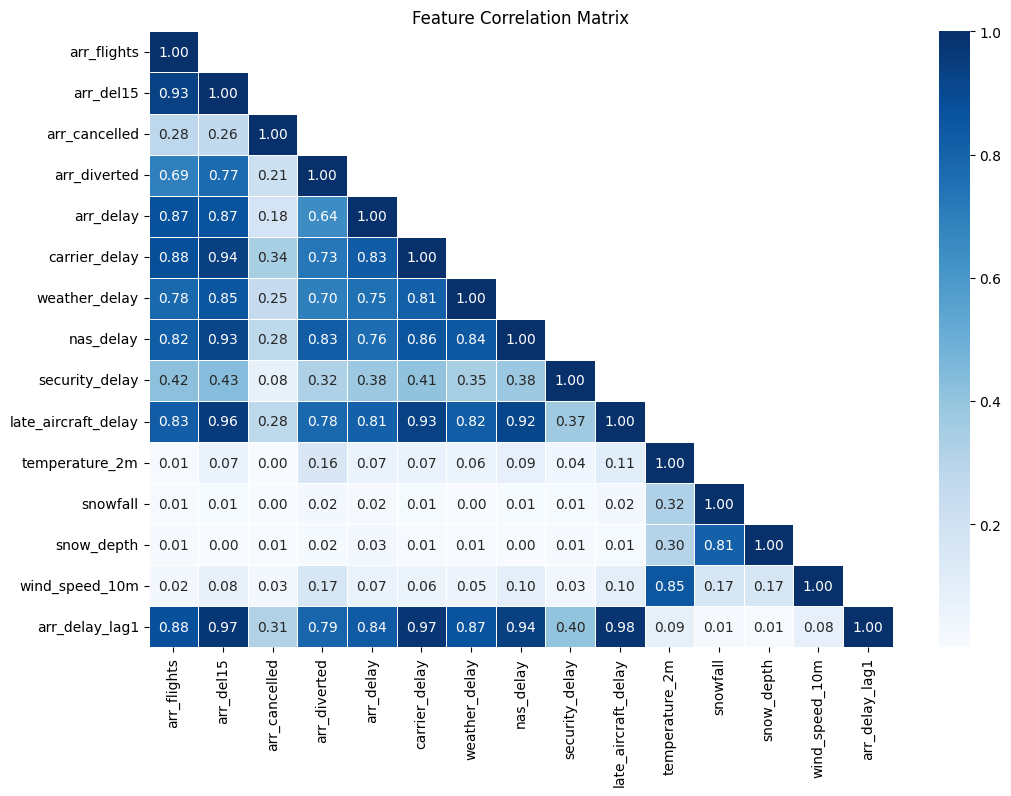

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Multicollinearity test
corr_matrix = features_df[numeric_cols].corr().abs()

# Create an upper triangle matrix of boolean values
upper_triangle_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Apply the mask to filter the upper triangle
high_corr_pairs = corr_matrix.where(upper_triangle_mask)
hi_corrs = []

# Iterate through the upper triangle of the matrix to find pairs
for i in range(len(high_corr_pairs.columns)):
    for j in range(i):
        if high_corr_pairs.iloc[j, i] > 0.90:  # Correlation threshold
            col1 = high_corr_pairs.columns[i]
            col2 = high_corr_pairs.columns[j]
            hi_corrs.append((col1, col2))

print("Highly Correlated Features:", hi_corrs)

#Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=upper_triangle_mask, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


Encoding carrier before we continue with feature importance testing (one-hot for non-tree based models and label-encoded for tree-based models)

In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

#Create copies of the original DataFrame
df_one_hot = features_df.copy()
df_label = features_df.copy()

### One-Hot Encoding ###
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity
carrier_encoded = one_hot_encoder.fit_transform(df_one_hot[['carrier']])

#Convert to DataFrame and add encoded columns
carrier_encoded_df = pd.DataFrame(carrier_encoded,
                                  columns=one_hot_encoder.get_feature_names_out(['carrier']))

#Concatenate with df_one_hot and drop original 'carrier'
df_one_hot = pd.concat([df_one_hot, carrier_encoded_df], axis=1)
df_one_hot.drop(columns=['carrier'], inplace=True)

### Label Encoding ###
label_encoder = LabelEncoder()
df_label['carrier'] = label_encoder.fit_transform(df_label['carrier'])


print("One-Hot Encoded DataFrame:")
print(df_one_hot.head())

print("\nLabel Encoded DataFrame:")
print(df_label.head())


One-Hot Encoded DataFrame:
      year  arr_flights  arr_del15  arr_cancelled  arr_diverted  arr_delay  \
198    4.0    -0.104129   0.019734       0.231987     -0.253648   0.123812   
1125   4.0    -0.094228  -0.036352      -0.053507      0.097296   0.023327   
444    4.0    -0.015609   0.045503      -0.083879     -0.253648   0.030400   
1283   4.0     0.023603   0.065209      -0.108176     -0.253648  -0.032654   
449    4.0     0.025738   0.012155      -0.144622     -0.253648   0.538773   

      carrier_delay  weather_delay  nas_delay  security_delay  ...  \
198        0.111173       0.643588   0.121948       -0.387863  ...   
1125       0.135804      -0.047917  -0.130241       -0.387863  ...   
444       -0.041248      -0.197774   0.019551       -0.387863  ...   
1283      -0.111660      -0.127017  -0.082755       -0.387863  ...   
449       -0.093616       0.057138   0.018726       -0.387863  ...   

      carrier_F9  carrier_FL  carrier_MQ  carrier_NK  carrier_OH  carrier_OO  \
198

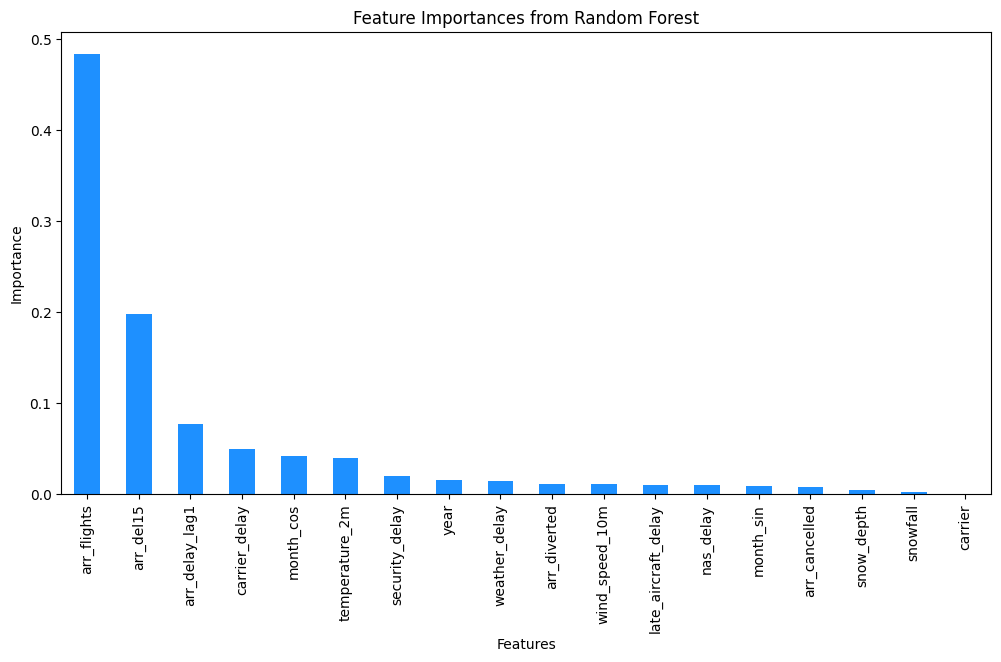

Feature Importances:
 arr_flights            0.483382
arr_del15              0.198038
arr_delay_lag1         0.076483
carrier_delay          0.049365
month_cos              0.041976
temperature_2m         0.039558
security_delay         0.020140
year                   0.014921
weather_delay          0.013870
arr_diverted           0.010796
wind_speed_10m         0.010424
late_aircraft_delay    0.009579
nas_delay              0.009414
month_sin              0.008561
arr_cancelled          0.007332
snow_depth             0.003861
snowfall               0.001988
carrier                0.000313
dtype: float64


In [17]:
#Feature importance testing

from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

X = df_label.drop(columns=['arr_delay'])  # Drop target variable
y = df_label['arr_delay']  # Target variable (arrival delay)

#Train a RandomForestRegressor model (we use the label encoded dataframe here)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

#Get and plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
importances.plot(kind='bar', color='dodgerblue')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

print("Feature Importances:\n", importances)


Based on the last two tests, we remove the below features

In [18]:
to_drop = ['arr_del15', 'snowfall', 'snow_depth', 'nas_delay', 'late_aircraft_delay', 'arr_cancelled']
df_label.drop(columns=to_drop, inplace=True)

df_one_hot.drop(columns=to_drop, inplace=True)
df_one_hot.dropna(inplace=True)

df_label

,year,carrier,arr_flights,arr_diverted,arr_delay,carrier_delay,weather_delay,security_delay,temperature_2m,wind_speed_10m,month_sin,month_cos,arr_delay_lag1
198,4,0,-0.104129,-0.253648,0.123812,0.111173,0.643588,-0.387863,-0.624899,1.086332,8.660254e-01,5.000000e-01,0.246091
1125,4,0,-0.094228,0.097296,0.023327,0.135804,-0.047917,-0.387863,-0.946978,1.843127,1.000000e+00,6.123234e-17,0.124159
444,4,0,-0.015609,-0.253648,0.030400,-0.041248,-0.197774,-0.387863,-0.463528,1.237915,8.660254e-01,-5.000000e-01,0.023660
1283,4,0,0.023603,-0.253648,-0.032654,-0.111660,-0.127017,-0.387863,0.611709,-0.921002,5.000000e-01,-8.660254e-01,0.030734
449,4,0,0.025738,-0.253648,0.538773,-0.093616,0.057138,-0.387863,1.021004,-1.302741,1.224647e-16,-1.000000e+00,-0.032329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,10,15,-0.435105,-0.323837,-0.406243,-0.408338,-0.406029,-0.387863,0.726447,-0.296572,5.000000e-01,-8.660254e-01,-0.433493
822,10,15,-0.426758,-0.253648,-0.442881,-0.369514,-0.356282,-0.387863,1.325452,-0.181752,1.224647e-16,-1.000000e+00,-0.405972
165,10,15,-0.449082,-0.323837,-0.431693,-0.418125,-0.352884,-0.387863,1.297192,-1.275930,-5.000000e-01,-8.660254e-01,-0.442616
993,10,15,-0.451411,-0.323837,-0.438456,-0.394330,-0.403248,-0.387863,1.286008,-0.673178,-8.660254e-01,-5.000000e-01,-0.431425


In [19]:
df_one_hot

,year,arr_flights,arr_diverted,arr_delay,carrier_delay,weather_delay,security_delay,temperature_2m,wind_speed_10m,month_sin,...,carrier_F9,carrier_FL,carrier_MQ,carrier_NK,carrier_OH,carrier_OO,carrier_UA,carrier_US,carrier_WN,carrier_YX
198,4.0,-0.104129,-0.253648,0.123812,0.111173,0.643588,-0.387863,-0.624899,1.086332,8.660254e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1125,4.0,-0.094228,0.097296,0.023327,0.135804,-0.047917,-0.387863,-0.946978,1.843127,1.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
444,4.0,-0.015609,-0.253648,0.030400,-0.041248,-0.197774,-0.387863,-0.463528,1.237915,8.660254e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1283,4.0,0.023603,-0.253648,-0.032654,-0.111660,-0.127017,-0.387863,0.611709,-0.921002,5.000000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,4.0,0.025738,-0.253648,0.538773,-0.093616,0.057138,-0.387863,1.021004,-1.302741,1.224647e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,10.0,-0.435105,-0.323837,-0.406243,-0.408338,-0.406029,-0.387863,0.726447,-0.296572,5.000000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
822,10.0,-0.426758,-0.253648,-0.442881,-0.369514,-0.356282,-0.387863,1.325452,-0.181752,1.224647e-16,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
165,10.0,-0.449082,-0.323837,-0.431693,-0.418125,-0.352884,-0.387863,1.297192,-1.275930,-5.000000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
993,10.0,-0.451411,-0.323837,-0.438456,-0.394330,-0.403248,-0.387863,1.286008,-0.673178,-8.660254e-01,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Now we want to store our dataframes as feature groups and feature views in Hopsworks

In [20]:
#To avoid Kafka Producer errors (you may need to restart kernel after running this cell)

!pip install confluent_kafka
from confluent_kafka import Producer

In [21]:
#Create a composite carrier key from one-hot encoded features
df_one_hot['carrier_key'] = df_one_hot.filter(like='carrier_').astype(str).agg('-'.join, axis=1)

#Hash the carrier key to reduce the length
import hashlib
df_one_hot['carrier_key'] = df_one_hot['carrier_key'].apply(lambda x: hashlib.md5(x.encode()).hexdigest())

# Convert all feature names to lowercase to avoid Hopsworks warnings
df_one_hot.columns = df_one_hot.columns.str.lower()

# Create 'event_time' to avoid Kafka error
df_one_hot['event_time'] = pd.to_datetime('2000-01-01')

# Create a new version of the feature group
one_hot_fg = fs.get_or_create_feature_group(
    name='airline_delay_one_hot_v8',
    description='One-hot encoded features with composite carrier key (v2)',
    version=1,
    primary_key=['carrier_key', 'year', 'month_sin', 'month_cos'],
    event_time='event_time',
    online_enabled=False,
)


In [22]:
one_hot_fg.insert(df_one_hot, write_options={
    "wait_for_job": True,
    "ingestion_mode": "overwrite",
    "streaming": False
})

print("One-hot encoded features successfully stored as a new version.")

Uploading Dataframe: 100.00% |██████████| Rows 1231/1231 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: airline_delay_one_hot_v8_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1171606/jobs/named/airline_delay_one_hot_v8_1_offline_fg_materialization/executions
One-hot encoded features successfully stored as a new version.


In [23]:
# Create 'event_time' to avoid Kafka error
df_label['event_time'] = pd.to_datetime('2000-01-01')

# Create a new version of the feature group
label_fg = fs.get_or_create_feature_group(
    name='airline_delay_label',
    description='Label encoded features with composite carrier key (v2)',
    version=1,
    primary_key=['carrier', 'year', 'month_sin', 'month_cos'],
    event_time='event_time',
    online_enabled=False,
)


In [24]:
label_fg.insert(df_label, write_options={
    "wait_for_job": True,
    "ingestion_mode": "overwrite",
    "streaming": False
})

print("Label encoded features successfully stored as a new version.")

Uploading Dataframe: 100.00% |██████████| Rows 1406/1406 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: airline_delay_label_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1171606/jobs/named/airline_delay_label_1_offline_fg_materialization/executions
Label encoded features successfully stored as a new version.


In [25]:
# Retrieve the feature groups
one_hot_fg = fs.get_feature_group('airline_delay_one_hot_v8', version=1)
label_fg = fs.get_feature_group('airline_delay_label', version=1)

# Feature View for One-Hot Encoded Features
one_hot_feature_view = fs.create_feature_view(
    name='airline_delay_one_hot_view',
    description='Feature view for one-hot encoded airline delay features',
    labels=['arr_delay'],  # Target column
    query=one_hot_fg.select_all(),
)

# Feature View for Label Encoded Features
label_feature_view = fs.create_feature_view(
    name='airline_delay_label_view',
    description='Feature view for label encoded airline delay features',
    labels=['arr_delay'],  # Target column
    query=label_fg.select_all(),
)

print("Two separate feature views created for one-hot and label encoded features.")


Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1171606/fs/1162309/fv/airline_delay_one_hot_view/version/3
Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1171606/fs/1162309/fv/airline_delay_label_view/version/3
Two separate feature views created for one-hot and label encoded features.


Now let's do the machine learning modelling

In [26]:
df_one_hot.drop(columns=['carrier_key', 'event_time'], inplace=True)
df_label.drop(columns=['event_time'], inplace=True)


In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X_label = df_label.drop(columns=['arr_delay'])  # For XGBoost
y_label = df_label['arr_delay']

X_one_hot = df_one_hot.drop(columns=['arr_delay'])  # For Neural Network & Linear Regression
y_one_hot = df_one_hot['arr_delay']

# Perform train-test split (80-20)
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(
    X_label, y_label, test_size=0.2, random_state=42
)

X_train_one_hot, X_test_one_hot, y_train_one_hot, y_test_one_hot = train_test_split(
    X_one_hot, y_one_hot, test_size=0.2, random_state=42
)


In [28]:
#XGBoost regressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, random_state=42)
xgb_regressor.fit(X_train_label, y_train_label)

# Make predictions
y_pred_xgb = xgb_regressor.predict(X_test_label)

# Evaluate model performance
mse_xgb = mean_squared_error(y_test_label, y_pred_xgb)
r2_xgb = r2_score(y_test_label, y_pred_xgb)

print(f"XGBoost Regressor - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}")


XGBoost Regressor - MSE: 0.49, R²: 0.70


In [29]:
#Neural network
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Standardize the data for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_one_hot)
X_test_scaled = scaler.transform(X_test_one_hot)

# Define neural network architecture
nn_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Single output for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the neural network
nn_model.fit(X_train_scaled, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on the test set
y_pred_nn = nn_model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test_one_hot, y_pred_nn)
r2_nn = r2_score(y_test_one_hot, y_pred_nn)

print(f"Neural Network - MSE: {mse_nn:.2f}, R²: {r2_nn:.2f}")


Epoch 1/50


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0859 - mae: 0.4867 - val_loss: 0.2489 - val_mae: 0.2789
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4029 - mae: 0.2621 - val_loss: 0.2121 - val_mae: 0.2370
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2437 - mae: 0.1990 - val_loss: 0.1939 - val_mae: 0.2283
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1769 - mae: 0.1753 - val_loss: 0.2322 - val_mae: 0.2480
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2855 - mae: 0.1955 - val_loss: 0.1888 - val_mae: 0.2225
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1223 - mae: 0.1577 - val_loss: 0.2214 - val_mae: 0.2426
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1008 - mae: 0.1565 - val_loss: 0.2270 - val_mae: 0.2361
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1301 - mae: 0.1522 - val_loss: 0.2779 - val_mae: 0.2599
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1029 - mae: 0.1517 - v

In [30]:
#Ridge regressor
from sklearn.linear_model import Ridge

# Initialize and train Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_one_hot, y_train_one_hot)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_one_hot)

# Evaluate performance
mse_ridge = mean_squared_error(y_test_one_hot, y_pred_ridge)
r2_ridge = r2_score(y_test_one_hot, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")


Ridge Regression - MSE: 0.16, R²: 0.76


Now, we're doing hyperparameter optimization using Optuna's Tree-Structured Parzen Estimator (TPE)

In [31]:
!pip install optuna

In [32]:
!pip install scikit-learn==1.3.0

In [45]:
from xgboost import XGBRegressor
import optuna
from sklearn.model_selection import cross_val_score


# Use XGBRegressor directly in the objective function
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    reg_lambda = trial.suggest_float('reg_lambda', 2, 5)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 1)

    model = XGBRegressor(  # Use XGBRegressor directly
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        reg_lambda=reg_lambda,
        reg_alpha=reg_alpha,
        objective='reg:squarederror'
    )

    score = cross_val_score(model, X_train_label, y_train_label, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

# Run Optuna study for XGBoost
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=200)

print("Best XGBoost Parameters:", study_xgb.best_params)

[I 2025-01-07 01:47:34,092] A new study created in memory with name: no-name-2843d38b-8fb9-4c3b-852a-50f15427c5b7
[I 2025-01-07 01:47:40,126] Trial 0 finished with value: -0.12371715774429799 and parameters: {'n_estimators': 190, 'max_depth': 6, 'learning_rate': 0.08563521445216991, 'reg_lambda': 4.396025181369402, 'reg_alpha': 0.07920145344814267}. Best is trial 0 with value: -0.12371715774429799.
[I 2025-01-07 01:47:41,635] Trial 1 finished with value: -0.1276884152082403 and parameters: {'n_estimators': 132, 'max_depth': 8, 'learning_rate': 0.07799164395869951, 'reg_lambda': 2.5906126874066446, 'reg_alpha': 0.7393266748147459}. Best is trial 0 with value: -0.12371715774429799.
[I 2025-01-07 01:47:42,386] Trial 2 finished with value: -0.14237236627704072 and parameters: {'n_estimators': 165, 'max_depth': 4, 'learning_rate': 0.012511517775155065, 'reg_lambda': 2.183613579228536, 'reg_alpha': 0.5999853432749743}. Best is trial 0 with value: -0.12371715774429799.
[I 2025-01-07 01:47:46,

Best XGBoost Parameters: {'n_estimators': 197, 'max_depth': 4, 'learning_rate': 0.08280541398576657, 'reg_lambda': 2.3185166867313565, 'reg_alpha': 0.9750473606580187}


In [46]:
# Use the best parameters from the Optuna study
best_xgb_params = study_xgb.best_params

xgb_model = XGBRegressor(
    n_estimators=best_xgb_params['n_estimators'],
    max_depth=best_xgb_params['max_depth'],
    learning_rate=best_xgb_params['learning_rate'],
    reg_lambda=best_xgb_params['reg_lambda'],
    reg_alpha=best_xgb_params['reg_alpha'],
    objective='reg:squarederror'
)

# Train the model with the best parameters
xgb_model.fit(X_train_label, y_train_label)

# Evaluate the model
xgb_predictions = xgb_model.predict(X_test_label)

# Evaluate model performance
mse_xgb = mean_squared_error(y_test_label, xgb_predictions)
r2_xgb = r2_score(y_test_label, xgb_predictions)

print(f"XGBoost Regressor with Optuna - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}")

XGBoost Regressor with Optuna - MSE: 0.42, R²: 0.74


In [48]:
from sklearn.neural_network import MLPRegressor

def objective_nn(trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (100, 50)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    alpha = trial.suggest_float('alpha', 0.001, 0.01, log=True)  # L2 Regularization
    learning_rate_init = trial.suggest_float('learning_rate_init', 0.001, 0.01)
    max_iter = trial.suggest_int('max_iter', 700, 1200)

    model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,
        random_state=42
    )

    score = cross_val_score(model, X_train_one_hot, y_train_one_hot, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

# Run Optuna study for Neural Network
study_nn = optuna.create_study(direction='maximize')
study_nn.optimize(objective_nn, n_trials=100)

print("Best Neural Network Parameters:", study_nn.best_params)


[I 2025-01-07 02:12:42,674] A new study created in memory with name: no-name-814fc9e1-f2d9-4d1b-8cfe-c6e70a75e311
[I 2025-01-07 02:12:49,810] Trial 0 finished with value: -0.34085063594006 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'alpha': 0.004821666748123581, 'learning_rate_init': 0.008151077781520716, 'max_iter': 906}. Best is trial 0 with value: -0.34085063594006.
[I 2025-01-07 02:12:51,953] Trial 1 finished with value: -0.40862742571206523 and parameters: {'hidden_layer_sizes': (50,), 'activation': 'relu', 'alpha': 0.001055269597696266, 'learning_rate_init': 0.009869147926635412, 'max_iter': 853}. Best is trial 0 with value: -0.34085063594006.
[I 2025-01-07 02:13:16,882] Trial 2 finished with value: -0.36869600992027124 and parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'alpha': 0.0030085170613962046, 'learning_rate_init': 0.008671766100466471, 'max_iter': 849}. Best is trial 0 with value: -0.34085063594006.
[I 2025-01-07 02:13:19,905

Best Neural Network Parameters: {'hidden_layer_sizes': (50,), 'activation': 'tanh', 'alpha': 0.007999764139158507, 'learning_rate_init': 0.0012832452364087725, 'max_iter': 884}


In [49]:
from sklearn.neural_network import MLPRegressor

# Use the best parameters from the Optuna study
best_nn_params = study_nn.best_params

nn_model = MLPRegressor(
    hidden_layer_sizes=best_nn_params['hidden_layer_sizes'],
    activation=best_nn_params['activation'],
    alpha=best_nn_params['alpha'],
    learning_rate_init=best_nn_params['learning_rate_init'],
    max_iter=best_nn_params['max_iter'],
    random_state=42
)

# Train the neural network
nn_model.fit(X_train_one_hot, y_train_one_hot)

# Evaluate the model
nn_predictions = nn_model.predict(X_test_one_hot)

mse_nn = mean_squared_error(y_test_one_hot, nn_predictions)
r2_nn = r2_score(y_test_one_hot, nn_predictions)

print(f"Neural Network with Optuna - MSE: {mse_nn:.2f}, R²: {r2_nn:.2f}")

Neural Network with Optuna - MSE: 0.21, R²: 0.70


In [58]:
from sklearn.linear_model import Ridge

def objective_ridge(trial):
    alpha = trial.suggest_float('alpha', 40, 140, log=True)  # Regularization strength

    model = Ridge(alpha=alpha)

    score = cross_val_score(model, X_train_one_hot, y_train_one_hot, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

# Run Optuna study for Ridge Regression
study_ridge = optuna.create_study(direction='maximize')
study_ridge.optimize(objective_ridge, n_trials=500)

print("Best Ridge Regression Parameters:", study_ridge.best_params)

[I 2025-01-07 02:55:22,076] A new study created in memory with name: no-name-1d5682d1-0e5b-4ab6-b409-2fc05242199e
[I 2025-01-07 02:55:22,182] Trial 0 finished with value: -0.29581405095453195 and parameters: {'alpha': 125.02210384447044}. Best is trial 0 with value: -0.29581405095453195.
[I 2025-01-07 02:55:22,299] Trial 1 finished with value: -0.29625780845454563 and parameters: {'alpha': 136.79882510968807}. Best is trial 0 with value: -0.29581405095453195.
[I 2025-01-07 02:55:22,419] Trial 2 finished with value: -0.29489896150039047 and parameters: {'alpha': 89.925871256437}. Best is trial 2 with value: -0.29489896150039047.
[I 2025-01-07 02:55:22,542] Trial 3 finished with value: -0.2954338413908244 and parameters: {'alpha': 113.39990664154018}. Best is trial 2 with value: -0.29489896150039047.
[I 2025-01-07 02:55:22,667] Trial 4 finished with value: -0.2955153123401041 and parameters: {'alpha': 42.625379570325485}. Best is trial 2 with value: -0.29489896150039047.
[I 2025-01-07 02

Best Ridge Regression Parameters: {'alpha': 74.64225245422797}


In [59]:
from sklearn.linear_model import Ridge

# Use the best parameters from the Optuna study
best_ridge_params = study_ridge.best_params

ridge_model = Ridge(
    alpha=best_ridge_params['alpha']
)

# Train the model
ridge_model.fit(X_train_one_hot, y_train_one_hot)

# Evaluate the model
ridge_predictions = ridge_model.predict(X_test_one_hot)

mse_ridge = mean_squared_error(y_test_one_hot, ridge_predictions)
r2_ridge = r2_score(y_test_one_hot, ridge_predictions)

print(f"Ridge Regression with Optuna - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")

Ridge Regression with Optuna - MSE: 0.15, R²: 0.79


Finally, let's add the models with Hyperparameter tuning to the Hopsworks model registry

In [60]:
mr = project.get_model_registry()

In [68]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema
import joblib
import os

# Save the XGBoost model locally
xgb_model_path = "xgboost_model"
os.makedirs(xgb_model_path, exist_ok=True)
xgb_model.save_model(f"{xgb_model_path}/model.json")

# Create input/output schemas for XGBoost
input_schema_xgb = Schema(X_train_label)
output_schema_xgb = Schema(y_train_label)

model_schema_xgb = ModelSchema(input_schema=input_schema_xgb, output_schema=output_schema_xgb)

# Evaluation metrics for XGBoost
xgb_metrics = {
    "MSE": str(abs(study_xgb.best_value))
}

# Register model in Hopsworks
mr = project.get_model_registry()

xgb_model_meta = mr.python.create_model(
    name="xgboost_airline_delay",
    metrics=xgb_metrics,
    model_schema=model_schema_xgb,
    input_example=X_test_label.sample().values,
    description="Tuned XGBoost model for airline delay prediction"
)

xgb_model_meta.save(xgb_model_path)
print("XGBoost model saved to Hopsworks Model Registry.")

  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/330173 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/226 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/1071 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1171606/models/xgboost_airline_delay/1
XGBoost model saved to Hopsworks Model Registry.


In [69]:
# Save the Neural Network model
nn_model_path = "mlp_model"
os.makedirs(nn_model_path, exist_ok=True)
joblib.dump(nn_model, f"{nn_model_path}/model.pkl")

# Create input/output schemas for MLP
input_schema_nn = Schema(X_train_one_hot)
output_schema_nn = Schema(y_train_one_hot)

model_schema_nn = ModelSchema(input_schema=input_schema_nn, output_schema=output_schema_nn)

# Evaluation metrics for Neural Network
nn_metrics = {
    "MSE": str(abs(study_nn.best_value))
}

nn_model_meta = mr.python.create_model(
    name="mlp_airline_delay",
    metrics=nn_metrics,
    model_schema=model_schema_nn,
    input_example=X_test_one_hot.sample().values,
    description="Tuned Neural Network (MLP) for airline delay prediction"
)

nn_model_meta.save(nn_model_path)
print("Neural Network model saved to Hopsworks Model Registry.")

  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/47887 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/293 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/2100 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1171606/models/mlp_airline_delay/1
Neural Network model saved to Hopsworks Model Registry.


In [70]:
# Save the Ridge model
ridge_model_path = "ridge_model"
os.makedirs(ridge_model_path, exist_ok=True)
joblib.dump(ridge_model, f"{ridge_model_path}/model.pkl")

# Create input/output schemas for Ridge
input_schema_ridge = Schema(X_train_one_hot)
output_schema_ridge = Schema(y_train_one_hot)

model_schema_ridge = ModelSchema(input_schema=input_schema_ridge, output_schema=output_schema_ridge)

# Evaluation metrics for Ridge
ridge_metrics = {
    "MSE": str(abs(study_ridge.best_value))
}

ridge_model_meta = mr.python.create_model(
    name="ridge_airline_delay",
    metrics=ridge_metrics,
    model_schema=model_schema_ridge,
    input_example=X_test_one_hot.sample().values,
    description="Tuned Ridge Regression for airline delay prediction"
)

ridge_model_meta.save(ridge_model_path)
print("Ridge Regression model saved to Hopsworks Model Registry.")


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/1491 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/292 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/2100 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1171606/models/ridge_airline_delay/1
Ridge Regression model saved to Hopsworks Model Registry.
